**Topik:** Optimalisasi dalam Menentukan Rute antara
Gedung Telkom University dengan Algoritma Dijkstra dan Backtracking
Dalama mengeali lingkungan kampus
<b>Kelompok: RDS</b>

Anggota:
1. Riodino Raihan 1301220413
2. Dodi Adi Sancoko 1301223071
3. Sean William Fernandes 1301223332



##**Shortest Path**

###Algoritma Djikstra

###Penanganan Studi Kasus

In [43]:
import time
import heapq

# Definisikan graf berbobot sesuai dengan tabel yang diberikan
graph = [
    [0, 500, 0, 700, 0, 0, 0],
    [500, 0, 150, 400, 450, 0, 750],
    [0, 150, 0, 0, 0, 0, 650],
    [700, 400, 0, 0, 200, 0, 0],
    [0, 450, 0, 200, 0, 150, 400],
    [0, 0, 0, 0, 150, 0, 250],
    [0, 750, 650, 0, 400, 250, 0]
]

# Fungsi Dijkstra
def dijkstra(graph, start):
    n = len(graph)
    distances = [float('inf')] * n
    distances[start] = 0
    priority_queue = [(0, start)]
    predecessors = [-1] * n

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in enumerate(graph[current_vertex]):
            if weight > 0:
                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    predecessors[neighbor] = current_vertex
                    heapq.heappush(priority_queue, (distance, neighbor))

    return distances, predecessors

# Fungsi Floyd-Warshall
def floyd_warshall(graph):
    n = len(graph)
    dist = [[float('inf')] * n for _ in range(n)]
    next_node = [[None] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            if i == j:
                dist[i][j] = 0
            elif graph[i][j] != 0:
                dist[i][j] = graph[i][j]
                next_node[i][j] = j

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    next_node[i][j] = next_node[i][k]

    return dist, next_node

# Fungsi untuk membangun jalur dari hasil Floyd-Warshall
def construct_path(next_node, u, v):
    if next_node[u][v] is None:
        return []
    path = [u]
    while u != v:
        u = next_node[u][v]
        path.append(u)
    return path

# Fungsi untuk mengubah indeks ke label huruf
def index_to_label(index):
    return chr(ord('A') + index)

# Fungsi untuk menampilkan hasil algoritma
def print_result(algorithm_name, time_taken, distance, path, start_label, end_label):
    formatted_path = "->".join(index_to_label(node) for node in path)
    print(f"{algorithm_name} algorithm (from {start_label} to {end_label}):")
    print(f"Running time: {time_taken:.6f} seconds")
    print(f"Minimum distance: {distance}")
    print(f"Best path: {formatted_path}")
    print()

# Main program
def main():
    start_node = int(input("Enter the start node (0-6): "))
    end_node = int(input("Enter the end node (0-6): "))
    start_label = index_to_label(start_node)
    end_label = index_to_label(end_node)

    # Run Dijkstra's algorithm
    start_time = time.time()
    dijkstra_distances, dijkstra_predecessors = dijkstra(graph, start_node)
    dijkstra_time = time.time() - start_time

    # Find the path for Dijkstra
    path = []
    node = end_node
    while node != -1:
        path.insert(0, node)
        node = dijkstra_predecessors[node]

    dijkstra_distance = dijkstra_distances[end_node]
    dijkstra_path = path

    # Run Floyd-Warshall algorithm
    start_time = time.time()
    floyd_warshall_distances, floyd_warshall_next_node = floyd_warshall(graph)
    floyd_warshall_time = time.time() - start_time

    # Find the path for Floyd-Warshall
    floyd_warshall_path = construct_path(floyd_warshall_next_node, start_node, end_node)
    floyd_warshall_distance = floyd_warshall_distances[start_node][end_node]

    # Print results
    print_result("Floyd-Warshall", floyd_warshall_time, floyd_warshall_distance, floyd_warshall_path, start_label, end_label)
    print_result("Dijkstra's", dijkstra_time, dijkstra_distance, dijkstra_path, start_label, end_label)

if __name__ == "__main__":
    main()


Enter the start node (0-6): 0
Enter the end node (0-6): 6
Floyd-Warshall algorithm (from A to G):
Running time: 0.000105 seconds
Minimum distance: 1250
Best path: A->B->G

Dijkstra's algorithm (from A to G):
Running time: 0.000033 seconds
Minimum distance: 1250
Best path: A->B->G



###Perbandingan Running Time Berdasarkan Input Size

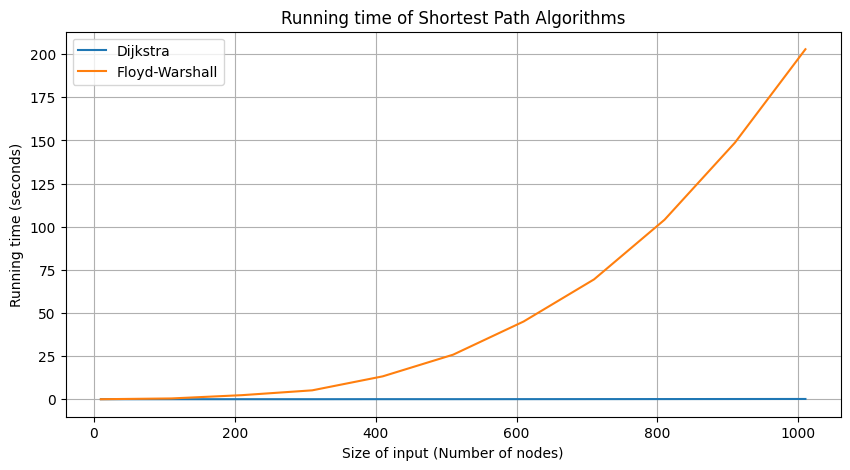

In [44]:
import time
import matplotlib.pyplot as plt
import random
import heapq

# Fungsi Dijkstra
def dijkstra(graph, start):
    n = len(graph)
    distances = [float('inf')] * n
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in enumerate(graph[current_vertex]):
            if weight > 0:
                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(priority_queue, (distance, neighbor))

    return distances


# Fungsi Floyd-Warshall
def floyd_warshall(graph):
    n = len(graph)
    dist = [[float('inf')] * n for _ in range(n)]

    # Inisialisasi jarak sesuai graf yang diberikan
    for i in range(n):
        for j in range(n):
            if i == j:
                dist[i][j] = 0
            elif graph[i][j] != 0:
                dist[i][j] = graph[i][j]

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist
# Fungsi untuk mengukur waktu eksekusi
def measure_time(graph, algorithm, start):
    start_time = time.time()
    if algorithm == 'dijkstra':
        dijkstra(graph, start)
    elif algorithm == 'floyd_warshall':
        floyd_warshall(graph)
    end_time = time.time()
    return end_time - start_time

# Membuat graf acak dengan ukuran variabel
def create_graph(size):
    graph = [[random.randint(1, 10) if i != j else 0 for j in range(size)] for i in range(size)]
    return graph

# Ukuran graf yang berbeda untuk pengukuran
sizes = range(10, 1100, 100)   # Ukuran input dari 10 hingga 100 dengan interval 10
dijkstra_times = []
floyd_warshall_times = []

# Mengukur waktu eksekusi untuk Dijkstra dan Floyd-Warshall
for size in sizes:
    graph = create_graph(size)
    start_node = 0
    dijkstra_times.append(measure_time(graph, 'dijkstra', start_node))
    floyd_warshall_times.append(measure_time(graph, 'floyd_warshall', start_node))

# Visualisasi hasil
plt.figure(figsize=(10, 5))
plt.plot(sizes, dijkstra_times, label='Dijkstra')
plt.plot(sizes, floyd_warshall_times, label='Floyd-Warshall')
plt.xlabel('Size of input (Number of nodes)')
plt.ylabel('Running time (seconds)')
plt.title('Running time of Shortest Path Algorithms')
plt.legend()
plt.grid(True)
plt.show()


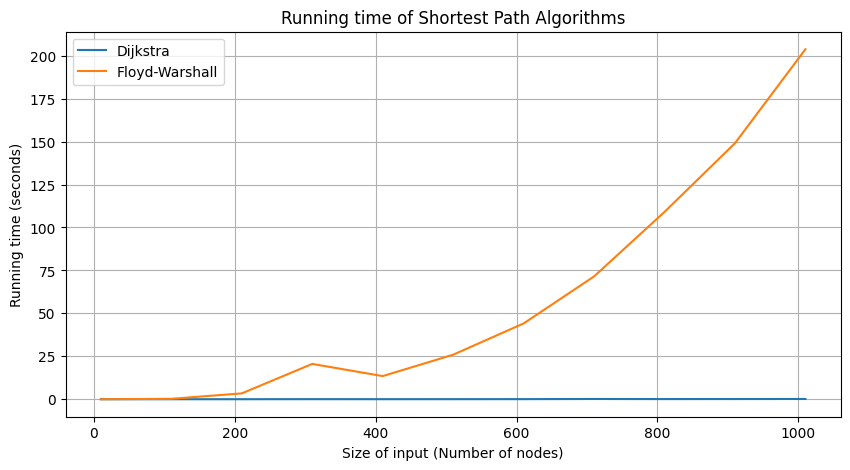

    Size of input (Number of nodes)  Dijkstra (seconds)  \
0                                10            0.000034   
1                               110            0.001765   
2                               210            0.007071   
3                               310            0.040037   
4                               410            0.022997   
5                               510            0.037787   
6                               610            0.054242   
7                               710            0.147292   
8                               810            0.091117   
9                               910            0.115711   
10                             1010            0.145726   

    Floyd-Warshall (seconds)  
0                   0.000220  
1                   0.235712  
2                   3.401335  
3                  20.552398  
4                  13.463371  
5                  25.911993  
6                  44.100823  
7                  71.480918  
8           

In [45]:
import time
import matplotlib.pyplot as plt
import random
import heapq

# Fungsi Dijkstra
def dijkstra(graph, start):
    n = len(graph)
    distances = [float('inf')] * n
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in enumerate(graph[current_vertex]):
            if weight > 0:
                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(priority_queue, (distance, neighbor))

    return distances

# Fungsi Floyd-Warshall
def floyd_warshall(graph):
    n = len(graph)
    dist = [[float('inf')] * n for _ in range(n)]

    # Inisialisasi jarak sesuai graf yang diberikan
    for i in range(n):
        for j in range(n):
            if i == j:
                dist[i][j] = 0
            elif graph[i][j] != 0:
                dist[i][j] = graph[i][j]

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist

# Fungsi untuk mengukur waktu eksekusi
def measure_time(graph, algorithm, start):
    start_time = time.time()
    if algorithm == 'dijkstra':
        dijkstra(graph, start)
    elif algorithm == 'floyd_warshall':
        floyd_warshall(graph)
    end_time = time.time()
    return end_time - start_time

# Membuat graf acak dengan ukuran variabel
def create_graph(size):
    graph = [[random.randint(1, 10) if i != j else 0 for j in range(size)] for i in range(size)]
    return graph

# Ukuran graf yang berbeda untuk pengukuran
sizes = range(10, 1100, 100)   # Ukuran input dari 10 hingga 1100 dengan interval 100
dijkstra_times = []
floyd_warshall_times = []

# Mengukur waktu eksekusi untuk Dijkstra dan Floyd-Warshall
for size in sizes:
    graph = create_graph(size)
    start_node = 0
    dijkstra_times.append(measure_time(graph, 'dijkstra', start_node))
    floyd_warshall_times.append(measure_time(graph, 'floyd_warshall', start_node))

# Visualisasi hasil
plt.figure(figsize=(10, 5))
plt.plot(sizes, dijkstra_times, label='Dijkstra')
plt.plot(sizes, floyd_warshall_times, label='Floyd-Warshall')
plt.xlabel('Size of input (Number of nodes)')
plt.ylabel('Running time (seconds)')
plt.title('Running time of Shortest Path Algorithms')
plt.legend()
plt.grid(True)
plt.show()

# Display the data in table form
import pandas as pd
data = {
    'Size of input (Number of nodes)': sizes,
    'Dijkstra (seconds)': dijkstra_times,
    'Floyd-Warshall (seconds)': floyd_warshall_times
}
df = pd.DataFrame(data)
print(df)
